In [1]:
#load dataframe
import pandas as pd

df = pd.read_csv("fruitdata.csv")
df.fruit= df.fruit.astype('category')
df.state = df.state.astype('category')
df["fruit"] = df["fruit"].map({"apple": 0, "banana": 1,"oranges":2})
print("hola")


hola


In [3]:
import math
import numpy as np

class Knn:
    def __init__(self, data):
        self.data = data
     
    def classification(self, x,n):
        def distance(WorldPoint,currentPoint):
            vecxtov = [WorldPoint[i] - currentPoint[i] for i in range(len(WorldPoint))] 
            distacc = 0
            for pos in vecxtov:
                distacc += pos**2
            return math.sqrt(distacc)
        
        knndf  = self.data.copy()
        knndf["distance"] = knndf.iloc[:, 3:].apply(distance,currentPoint=x, axis=1)
        knndf = knndf.sort_values(by='distance', ascending=True).fruit
        
        knnselection = knndf.head(n)
        classification = knnselection.value_counts().index[0]
        return  classification

df = df.sample(frac = 1,random_state=23)
train=df.sample(frac=0.94,random_state=109) #random state is a seed value
test=df.drop(train.index)

fruitKnn = Knn(train)

Maxneighboorhods = 15
ListNeighboorhods = []
ListPrediction = []
for neighboorhods in range(1,Maxneighboorhods): 
    AcurracyList = []
    for i in range(len(test)):
        currentTest = test.iloc[[i]]
        currentStats = currentTest.values.tolist()[0][3:]

        classification = fruitKnn.classification(currentStats,neighboorhods)
        realclass = currentTest.fruit.item()
        #print("predict: ",classification,"real",realclass)
        AcurracyList.append(classification==realclass)

    NpAcurracyList = np.array(AcurracyList)
    hits = len(NpAcurracyList[NpAcurracyList==True]) #Numero de aciertos
    numberSamples = len(AcurracyList) #Numero de muestras
    prediction = hits/numberSamples
    print(prediction)
    ListNeighboorhods.append(neighboorhods)
    ListPrediction.append(prediction)

0.8333333333333334
0.8095238095238095
0.8095238095238095
0.8571428571428571
0.8095238095238095
0.8333333333333334
0.8095238095238095
0.8095238095238095
0.8571428571428571
0.7857142857142857
0.8095238095238095
0.7857142857142857
0.7857142857142857
0.7857142857142857


Using matplotlib backend: Qt5Agg


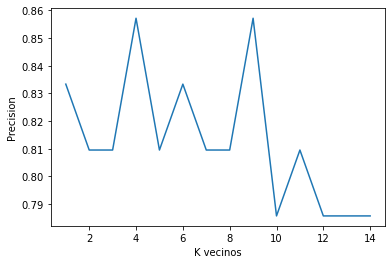

In [5]:
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ListNeighboorhods, ListPrediction)
plt.xlabel("K vecinos")
plt.ylabel("Precision")
plt.show()


In [10]:
df = pd.read_csv("fruitdata.csv")
df.fruit= df.fruit.astype('category')
df.state = df.state.astype('category')
df = df[df.fruit =="oranges" ]
df["state"] = df["state"].map({"good": 1, "bad": 0})

In [11]:
import math
import numpy as np

class Knn:
    def __init__(self, data):
        self.data = data
     
    def classification(self, x,n):
        def distance(WorldPoint,currentPoint):
            vecxtov = [WorldPoint[i] - currentPoint[i] for i in range(len(WorldPoint))] 
            distacc = 0
            for pos in vecxtov:
                distacc += pos**2
            return math.sqrt(distacc)
        
        knndf  = self.data.copy()
        knndf["distance"] = knndf.iloc[:, 3:].apply(distance,currentPoint=x, axis=1)
        knndf = knndf.sort_values(by='distance', ascending=True).state
        
        knnselection = knndf.head(n)
        classification = knnselection.value_counts().index[0]
        print(classification)
        return  classification

df = df.sample(frac = 1,random_state=23)
train=df.sample(frac=0.80,random_state=109) #random state is a seed value
test=df.drop(train.index)

fruitKnn = Knn(train)
print("entre")

Maxneighboorhods = 10
ListNeighboorhods = []
ListPrediction = []
for neighboorhods in range(1,Maxneighboorhods): 
    AcurracyList = []
    for i in range(len(test)):
        currentTest = test.iloc[[i]]
        currentStats = currentTest.values.tolist()[0][3:]

        classification = fruitKnn.classification(currentStats,neighboorhods)
        realclass = currentTest.state.item()
        #print("predict: ",classification,"real",realclass)
        AcurracyList.append(classification==realclass)

    NpAcurracyList = np.array(AcurracyList)
    hits = len(NpAcurracyList[NpAcurracyList==True]) #Numero de aciertos
    numberSamples = len(AcurracyList) #Numero de muestras
    prediction = hits/numberSamples
    print(prediction)
    ListNeighboorhods.append(neighboorhods)
    ListPrediction.append(prediction)

entre
0.9166666666666666
0.7777777777777778
0.75
0.7777777777777778
0.8055555555555556
0.7777777777777778
0.8055555555555556
0.8055555555555556
0.8055555555555556
0.8333333333333334
0.8055555555555556
0.8055555555555556
0.8055555555555556
0.7777777777777778


Using matplotlib backend: Qt5Agg


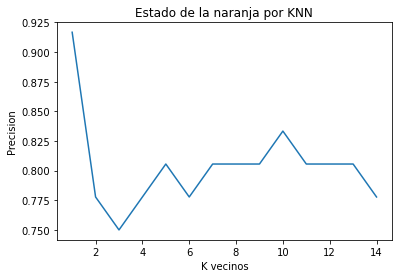

In [12]:
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ListNeighboorhods, ListPrediction)
plt.title("Estado de la naranja por KNN")
plt.xlabel("K vecinos")
plt.ylabel("Precision")
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'